In [34]:
import numpy as np 
import matplotlib.pyplot as plt 
import tqdm 
import pandas as pd 
def simulate(I, q, p,t, V, p_mask):
    p_mask = np.random.choice([0, p_mask], p = [1 - p_mask, p_mask])
    P_unadjusted = (1 - np.exp(-I * (q * 0.28 *(1- p_mask)) * p * t /V)) * 0.9
    print(f"Unadjusted Probability of infection: {P_unadjusted*100:.2f}%")
    return P_unadjusted 


Americans vs Korean: Workday duration 

Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted 

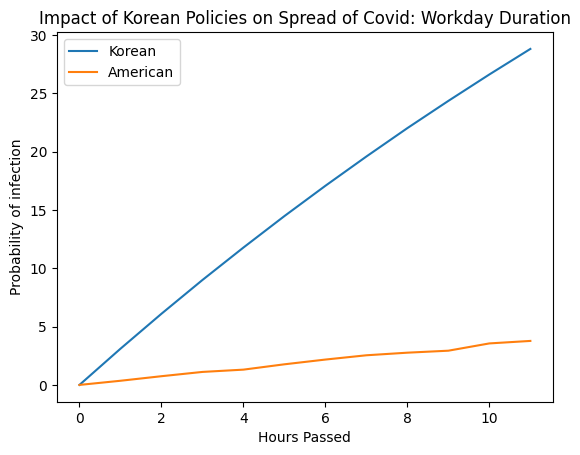

In [38]:
def visualizeWorkday():
    I = 1  
    q = 100 
    p = 0.32  
    V = 253.5
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    iterations = 2000
    for i in range(12):
        y_accum = 0
        y_accum1 = 0
        for j in range(iterations):
            y_accum+=simulate(I,q,p,i,V,0.09)
            y_accum1+=simulate(I,q,p,i,V,0.94)
        y_1.append(y_accum/iterations * 100)
        y_2.append(y_accum1/iterations * 100)
        x_1.append(i)
        x_2.append(i)
    
    dfamerica = pd.DataFrame({'hours': x_1, 'infection_rate':y_1} )
    dfamerica.to_csv('american_infectionrate_sequential.csv')
    dfkorea = pd.DataFrame({'hours': x_2, 'infection_rate':y_2})
    dfkorea.to_csv('korean_infectionrate_sequential.csv')
    plt.xlabel('Hours Passed')
    plt.ylabel('Probability of infection')
    plt.plot(x_1,y_1, label = 'Korean')
    plt.plot(x_2,y_2, label = 'American')
    plt.legend()
    plt.title('Impact of Korean Policies on Spread of Covid: Workday Duration')
    plt.show()
plt.clf()
visualizeWorkday()

Test:

Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted Probability of infection: 0.00%
Unadjusted 

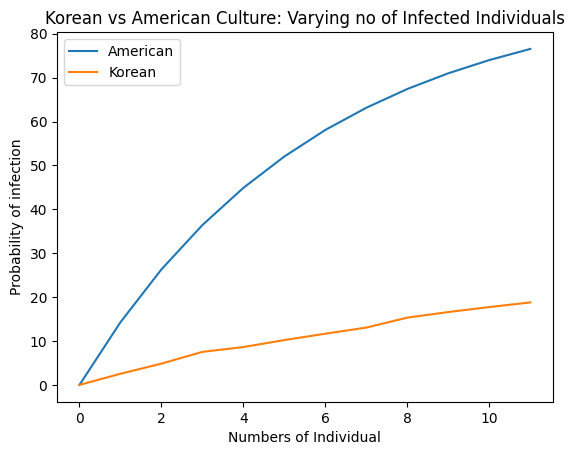

In [40]:
def varyingIndividualCounts():
    I = 1  
    q = 100 
    p = 0.32  
    V = 253.5
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    x_scatter = []
    iterations = 2000
    for i in range(12):
        y_accum = 0
        y_accum1 = 0
       
        for j in range(iterations):
            y_val = simulate(i,q,p,4.93,V,0.09)
            y_val1  = simulate(i,q,p,7.52,V,0.94)
            x_scatter.append(i)
            y_accum+=y_val
            y_accum1+=y_val1

        y_1.append(y_accum/iterations * 100)
        y_2.append(y_accum1/iterations * 100)
        x_1.append(i)
        x_2.append(i)
    dfamerica = pd.DataFrame({'no of infected individuals': x_1, 'infection_rate':y_1} )
    dfamerica.to_csv('american_infectionrate_individuals.csv')
    dfkorea = pd.DataFrame({'no of infected individuals': x_2, 'infection_rate':y_2})
    dfkorea.to_csv('korean_infectionrate_individuals.csv')
    plt.xlabel('Numbers of Individual')
    plt.ylabel('Probability of infection')
    plt.plot(x_1,y_1, label = 'American')
    plt.plot(x_2,y_2, label = 'Korean')
    plt.title('Korean vs American Culture: Varying no of Infected Individuals')
    plt.legend()
    plt.show()
plt.clf()
varyingIndividualCounts()